In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


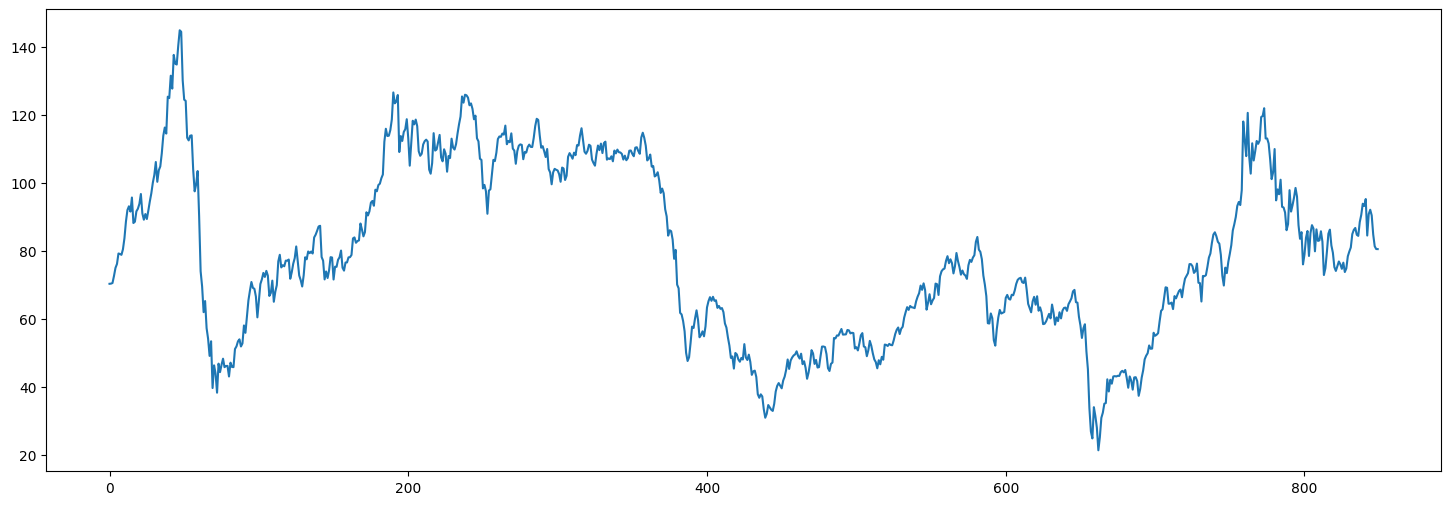

In [43]:
from src.utils import clean_list

df = pd.read_excel('data/OIL_WEEKLY.xlsx', engine='openpyxl')
value = df[df.columns[1]].tolist()
clean_list(value)
plt.figure(figsize=(18, 6))
plt.plot(value)

In [45]:
df.head()

,ds,y
0,2007-08-06 04:00:00,70.389999
1,2007-08-13 04:00:00,70.440002
2,2007-08-20 04:00:00,70.620003
3,2007-08-27 04:00:00,72.690002
4,2007-09-03 04:00:00,75.070000


In [46]:
df.tail()

,ds,y
845,2023-10-23 04:00:00,90.480003
846,2023-10-30 04:00:00,84.889999
847,2023-11-06 05:00:00,81.430000
848,2023-11-13 05:00:00,80.610001
849,2023-11-17 21:59:48,80.589996


In [44]:
col_list = df.columns.tolist()
print(col_list)
col_list[0] = 'ds'
col_list[1] = 'y'
df.columns = col_list
print(col_list)

['Sample Time', 'Close']
['ds', 'y']


In [6]:
m = Prophet()
m.fit(df)

06:38:15 - cmdstanpy - INFO - Chain [1] start processing


06:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
len(df)

2014

In [8]:
future = m.make_future_dataframe(periods=10, freq='D')
future.tail(10)

,ds
1000,2023-11-17 09:53:00
1001,2023-11-18 09:53:00
1002,2023-11-19 09:53:00
1003,2023-11-20 09:53:00
1004,2023-11-21 09:53:00
1005,2023-11-22 09:53:00
1006,2023-11-23 09:53:00
1007,2023-11-24 09:53:00
1008,2023-11-25 09:53:00
1009,2023-11-26 09:53:00


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1005,2023-11-22 09:53:00,33336.760986,29797.642528,37404.662232
1006,2023-11-23 09:53:00,33043.647915,29383.749303,36759.534918
1007,2023-11-24 09:53:00,32877.936141,28935.216709,36443.814851
1008,2023-11-25 09:53:00,32722.116688,29020.351990,36681.513964
1009,2023-11-26 09:53:00,32592.807328,28820.148120,36226.541844


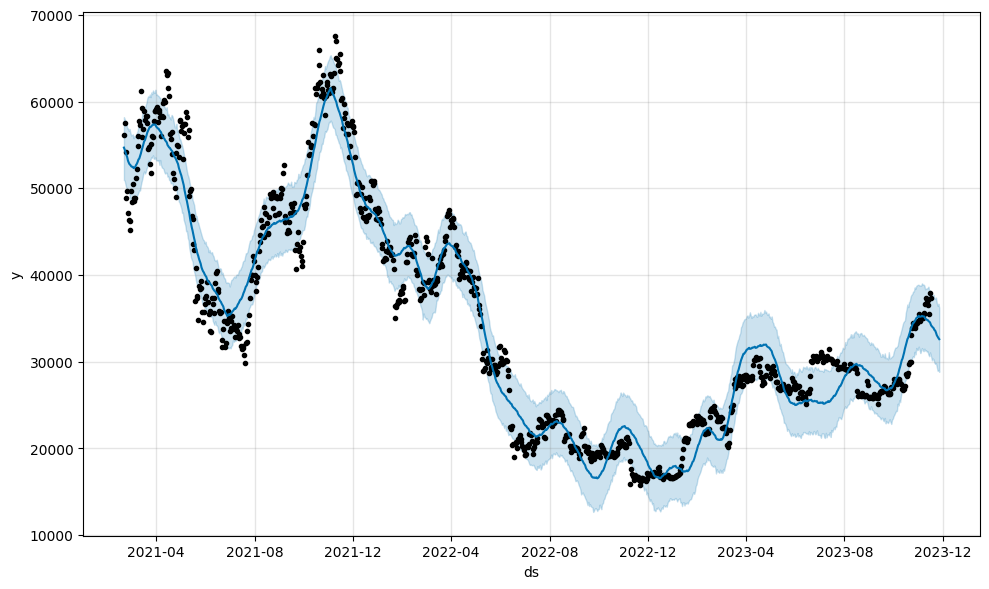

In [10]:
fig1 = m.plot(forecast)

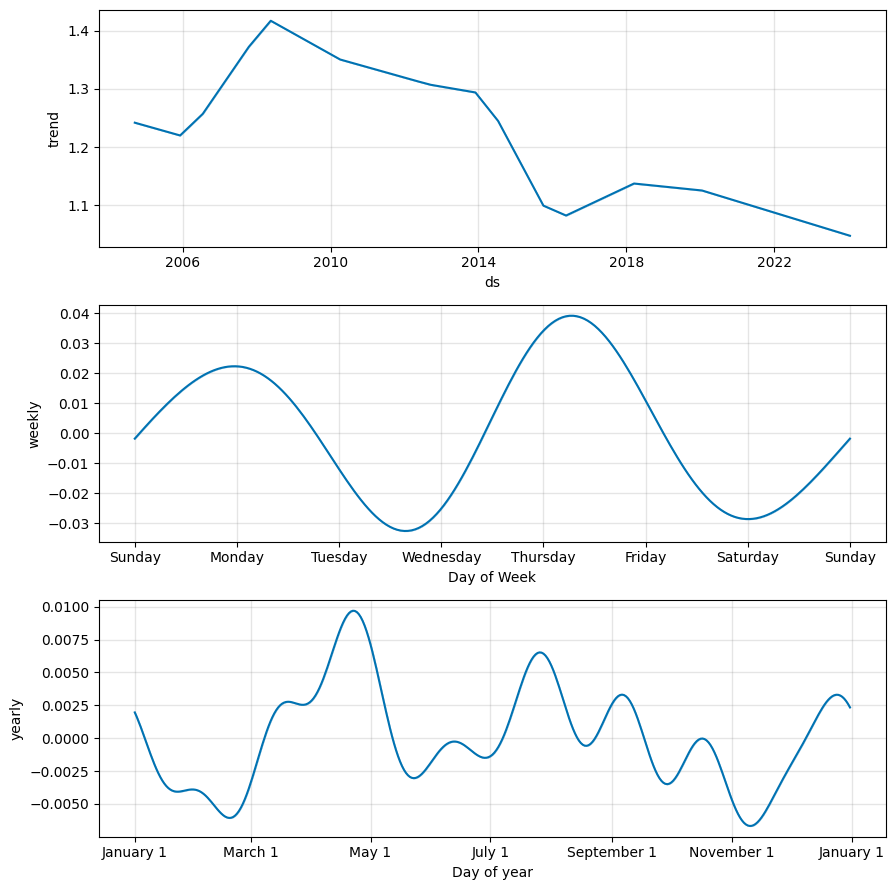

In [23]:
# Python
fig2 = m.plot_components(forecast)

In [32]:
pd.to_datetime(df['ds'])

0      2001-12-07 14:30:00
1      2001-12-10 14:30:00
2      2001-12-11 14:30:00
3      2001-12-12 14:30:00
4      2001-12-13 14:30:00
               ...        
2009   2009-12-01 14:30:00
2010   2009-12-02 14:30:00
2011   2009-12-03 14:30:00
2012   2009-12-04 14:30:00
2013   2009-12-07 14:30:00
Name: ds, Length: 2014, dtype: datetime64[ns]

In [47]:
sub_df = df[["ds", "y"]].loc[:int(len(df)*0.8)]
sub_df["ds"] = pd.to_datetime(sub_df["ds"])

In [48]:
sub_m = Prophet()
sub_m.fit(sub_df)

08:15:46 - cmdstanpy - INFO - Chain [1] start processing
08:15:46 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
sub_future = sub_m.make_future_dataframe(periods=len(df)-int(len(df)*0.8), freq='W')
sub_future.tail()

,ds
846,2023-10-29 04:00:00
847,2023-11-05 04:00:00
848,2023-11-12 04:00:00
849,2023-11-19 04:00:00
850,2023-11-26 04:00:00


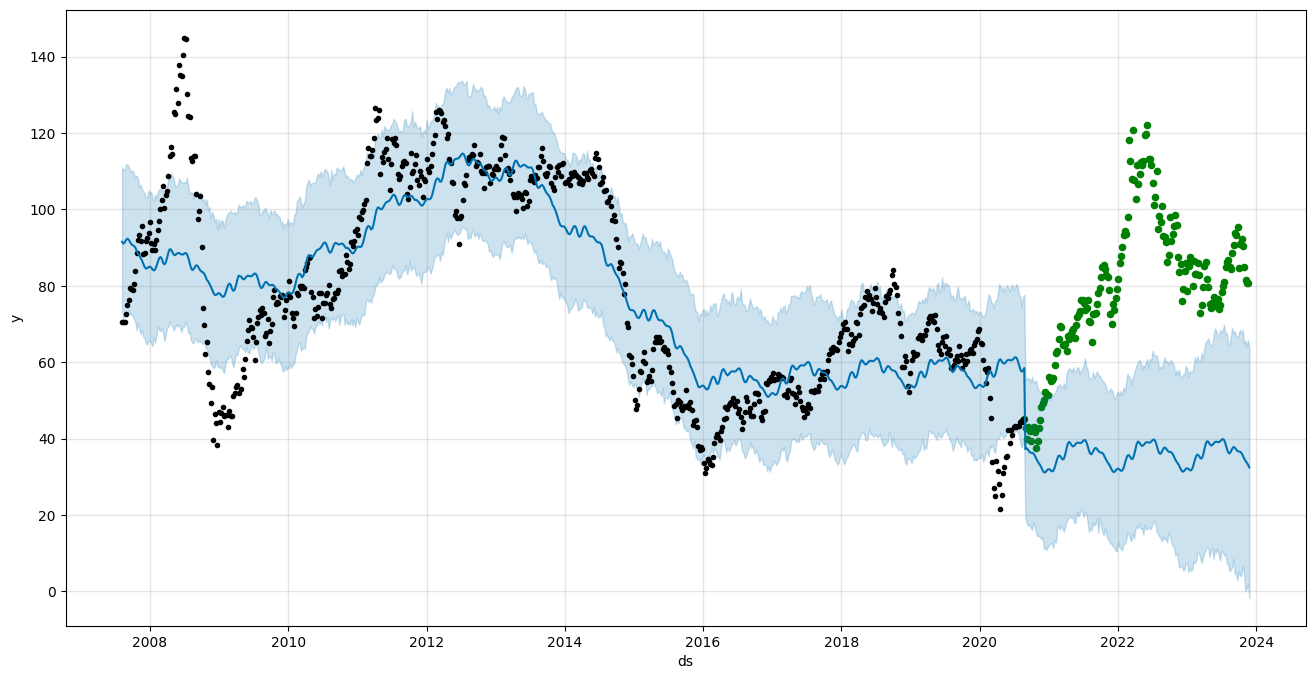

In [51]:
sub_forecast = sub_m.predict(sub_future)
ax = df.loc[int(len(df)*0.8):].plot(x="ds", y="y", figsize=(16, 8), color="green", kind="scatter")
sub_fig = sub_m.plot(sub_forecast, ax=ax)

In [42]:
sub_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

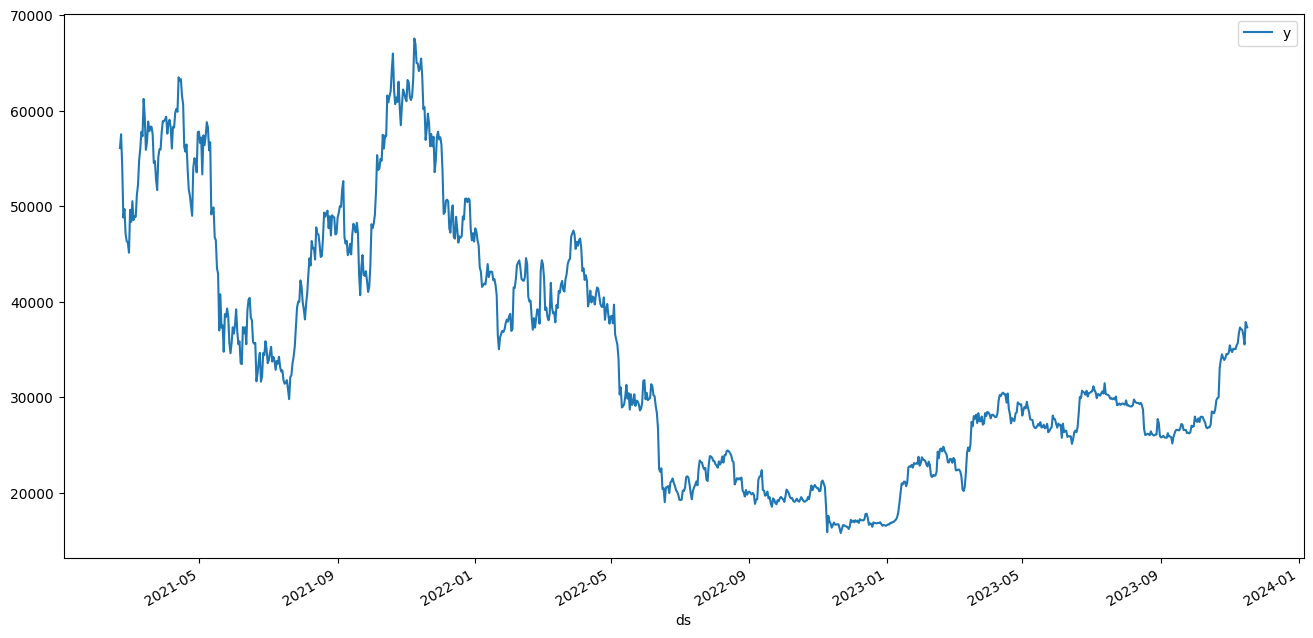